# Experimentación en Python - Análisis de tiempos de ejecución

Utilizaremos esta notebook para realizar un análisis acerca de los tiempos de ejecución en los cuales tendremos en cuenta varios factores que pueden presentarse, los cuales son: **diferentes tamaños de imágenes, cantidad de threads y tipos de filtro**.

Para llevar a cabo el análisis de forma precisa debimos tomar muestras de los tiempos propiamente dichos. Con este objetivo, se realizó el muestreo de los datos ejecutando reiteradamente el programa, intentando obtener graficos y conclusiones lo más representativas posibles. Decidimos correr el programa probando el desempeño desde 1 a 25 threads, y 10 pasadas en cada uno para luego calcular el promedio y obtener información correcta y exacta.

Una aclaración importante y a tener en cuenta es que los tests se ejecutaron en una computadora que cuenta con un procesador **Ryzen 5 3600X (6 cores - 12 threads)** y **16GB de memoria RAM**.

In [1]:
# Importamos las librerías básicas y necesarias

import os                          # procesos

import numpy as np                 # arreglos numpy - cálculos numéricos
import matplotlib.pyplot as plt    # gráficos
import pandas as pd                # datasets - análisis de datos

In [2]:
# Definimos como se verá el gráfico utilizado para exponer los datos recopilados

def plot(ths, time, std, title, xlabel, ylabel):

    fig, ax = plt.subplots()
    ax.plot(ths, time,'b-', color='blue')
    if np.any(std) != 0:
        ax.fill_between(ths, time-std, time+std, color='turquoise')


    ax.set(xlabel=xlabel, ylabel=ylabel,
           title=title)
    ax.grid()

    fig.savefig("test.png")
    plt.show()

## Cantidad de threads

En un principio podríamos pensar que respecto a la cantidad de threads utilizados para realizar el filtrado de la imagen, cuánto más grande es la cantidad, mejor performance se va a obtener y menos tardará el aplicado, ya que la tarea sería paralelizada y dividida en varias partes iguales. Pero también deberíamos tener en cuenta cuánto tarda en crearse cada thread y el tiempo que la ejecución implica en cada uno, por lo que todavía no podemos estar seguros sobre esto.

En este caso utiliazremos el filtro **brigthness** en una imagen de **1120 x 580 pixeles**.

In [3]:
# Código utilizado para correr los tests 

for n_threads in range(1,26):
    for i in range(1,11): 
        cmd = "./main brightness " + str(n_threads) + " 0,5 0 imgs/imagen_grande.ppm imgs/imagen_grande.ppm"
        os.system(cmd)

In [4]:
# Traigo los datos obtenidos y los organizo en una tabla

dataframe = pd.read_csv('test_brightness.csv', names=['Tiempo','Threads', 'Filtro', 'Tamaño (pixeles)'])
dataframe

,Tiempo,Threads,Filtro,Tamaño (pixeles)
0,0.167049,1,brightness,649600
1,0.176340,1,brightness,649600
2,0.170717,1,brightness,649600
3,0.177725,1,brightness,649600
4,0.176549,1,brightness,649600
...,...,...,...,...
245,0.029532,25,brightness,649600
246,0.032304,25,brightness,649600
247,0.031487,25,brightness,649600
248,0.032124,25,brightness,649600


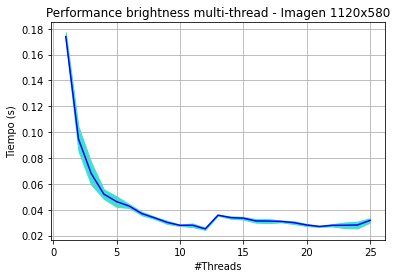

In [5]:
ths = np.arange(1,26)
df_mean_time = dataframe.groupby('Threads')['Tiempo'].mean()
df_std_time = dataframe.groupby('Threads')['Tiempo'].std()
xlabel='#Threads'
ylabel='Tiempo (s)'
title='Performance brightness multi-thread - Imagen 1120x580'

plot(ths,df_mean_time, df_std_time, title, xlabel, ylabel)

Efectivamente podemos observar que en un principio, a medida que aumenta el número de threads, la performance mejora considerablemente y el tiempo que se tarda en aplicar el filtro a la imagen es menor. Pero a partir de los 12 threads parece estancarse, y el tiempo que conlleva la ejecución comienza a ser el mismo de forma casi constante, por lo que podríamos intuir que el procesador del equipo utilizado tuvo que ver con el resultado, ya que llegó a su máximo de threads reales en uso.

## Tamaño de imágenes

En este caso utilizaremos el mismo tipo de test que en el anterior, pero esta vez utilizando 3 imágenes de diferentes tamaños (pequeña, mediana y grande). Y a partir de esto nuestra hipótesis es que cuanto mayor cantidad de píxeles tenga la imagen, más se va a tardar en aplicar el filtro seleccionado.

Seleccionamos el filtro **shades** para realizar este experimento.

### Imagen pequeña (159 x 160 pixeles)

In [6]:
# Código utilizado para correr los tests 

for n_threads in range(1,26):
    for i in range(1,11): 
        cmd = "./main shades " + str(n_threads) + " 10 0 imgs/imagen_chica.ppm imgs/imagen_chica.ppm"
        os.system(cmd)

In [7]:
# Traigo los datos obtenidos y los organizo en una tabla

dataframe = pd.read_csv('test_imgChica.csv', names=['Tiempo','Threads', 'Filtro', 'Tamaño (pixeles)'])
dataframe

,Tiempo,Threads,Filtro,Tamaño (pixeles)
0,0.007798,1,shades,25440
1,0.007974,1,shades,25440
2,0.007939,1,shades,25440
3,0.008846,1,shades,25440
4,0.006931,1,shades,25440
...,...,...,...,...
245,0.002548,25,shades,25440
246,0.002268,25,shades,25440
247,0.002663,25,shades,25440
248,0.002461,25,shades,25440


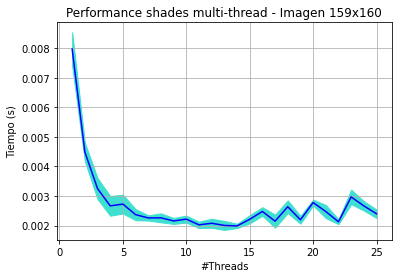

In [8]:
ths = np.arange(1,26)
df_mean_time = dataframe.groupby('Threads')['Tiempo'].mean()
df_std_time = dataframe.groupby('Threads')['Tiempo'].std()
xlabel='#Threads'
ylabel='Tiempo (s)'
title='Performance shades multi-thread - Imagen 159x160'

plot(ths,df_mean_time, df_std_time, title, xlabel, ylabel)

### Imagen mediana (450 x 253 pixeles)

In [10]:
# Código utilizado para correr los tests 

for n_threads in range(1,26):
    for i in range(1,11): 
        cmd = "./main shades " + str(n_threads) + " 10 0 imgs/imagen_mediana.ppm imgs/imagen_mediana.ppm"
        os.system(cmd)

In [11]:
# Traigo los datos obtenidos y los organizo en una tabla

dataframe = pd.read_csv('test_imgMediana.csv', names=['Tiempo','Threads', 'Filtro', 'Tamaño (pixeles)'])
dataframe

,Tiempo,Threads,Filtro,Tamaño (pixeles)
0,0.034854,1,shades,113850
1,0.033388,1,shades,113850
2,0.033354,1,shades,113850
3,0.033915,1,shades,113850
4,0.033693,1,shades,113850
...,...,...,...,...
245,0.005886,25,shades,113850
246,0.005674,25,shades,113850
247,0.005833,25,shades,113850
248,0.005772,25,shades,113850


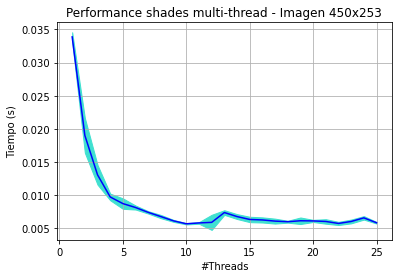

In [12]:
ths = np.arange(1,26)
df_mean_time = dataframe.groupby('Threads')['Tiempo'].mean()
df_std_time = dataframe.groupby('Threads')['Tiempo'].std()
xlabel='#Threads'
ylabel='Tiempo (s)'
title='Performance shades multi-thread - Imagen 450x253'

plot(ths,df_mean_time, df_std_time, title, xlabel, ylabel)

### Imágen grande (1120 x 580 pixeles)

In [13]:
# Código utilizado para correr los tests 

for n_threads in range(1,26):
    for i in range(1,11): 
        cmd = "./main shades " + str(n_threads) + " 10 0 imgs/imagen_grande.ppm imgs/imagen_grande.ppm"
        os.system(cmd)

In [14]:
# Traigo los datos obtenidos y los organizo en una tabla

dataframe = pd.read_csv('test_imgGrande.csv', names=['Tiempo','Threads', 'Filtro', 'Tamaño (pixeles)'])
dataframe

,Tiempo,Threads,Filtro,Tamaño (pixeles)
0,0.199377,1,shades,649600
1,0.196976,1,shades,649600
2,0.193320,1,shades,649600
3,0.197342,1,shades,649600
4,0.194989,1,shades,649600
...,...,...,...,...
245,0.030816,25,shades,649600
246,0.034588,25,shades,649600
247,0.032996,25,shades,649600
248,0.035031,25,shades,649600


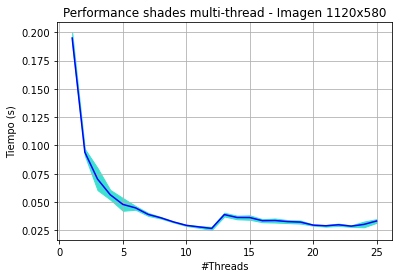

In [15]:
ths = np.arange(1,26)
df_mean_time = dataframe.groupby('Threads')['Tiempo'].mean()
df_std_time = dataframe.groupby('Threads')['Tiempo'].std()
xlabel='#Threads'
ylabel='Tiempo (s)'
title='Performance shades multi-thread - Imagen 1120x580'

plot(ths,df_mean_time, df_std_time, title, xlabel, ylabel)

Una vez realizados los tests y analizados los datos devueltos por el programa, podemos comprobar que estábamos en lo correcto cuándo pensabamos que a más cantidad de pixeles por imagen, es decir mayor tamaño, más tiempo iba a necesitar la computadora para aplicar el filtro. Esto es muy probable que suceda porque se necesita recorrer más pixeles a los que se les iría aplicando el filtro uno por uno, ya que **shades** pertenece al tipo **pixel to pixel**. Otra cosa a considerar es que vuelve a suceder los mismo que antes, que cuando se utilizan 12 threads se llega al mejor performance posible y mejores tiempos se obtienen, esto debido al procesador y su límite.

## Comparación de performance con filtros multi-thread

In [16]:
# Código utilizado para correr los tests 

for n_threads in range(1,26):
    for i in range(1,11): 
        cmd = "./main edgeDetection " + str(n_threads) + " 1 1 imgs/imagen_grande.ppm imgs/imagen_grande.ppm"
        os.system(cmd)

In [17]:
# Traigo los datos obtenidos y los organizo en una tabla

dataframe = pd.read_csv('test_edgeDetection.csv', names=['Tiempo','Threads', 'Filtro', 'Tamaño (pixeles)'])
dataframe

,Tiempo,Threads,Filtro,Tamaño (pixeles)
0,0.708002,1,edgeDetection,649600
1,0.710131,1,edgeDetection,649600
2,0.725319,1,edgeDetection,649600
3,0.720449,1,edgeDetection,649600
4,0.725449,1,edgeDetection,649600
...,...,...,...,...
245,0.119152,25,edgeDetection,649600
246,0.108863,25,edgeDetection,649600
247,0.104424,25,edgeDetection,649600
248,0.103135,25,edgeDetection,649600


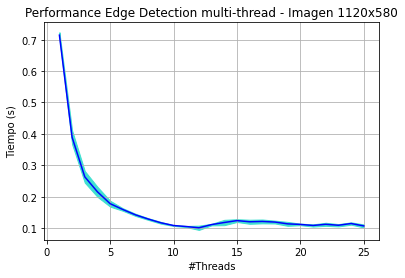

In [18]:
ths = np.arange(1,26)
df_mean_time = dataframe.groupby('Threads')['Tiempo'].mean()
df_std_time = dataframe.groupby('Threads')['Tiempo'].std()
xlabel='#Threads'
ylabel='Tiempo (s)'
title='Performance Edge Detection multi-thread - Imagen 1120x580'

plot(ths,df_mean_time, df_std_time, title, xlabel, ylabel)

Si realizamos la comparación de los tiempos de ejecución que devolvían los tests, y podíamos ver en los gráficos, de los filtros **pixel to pixel (brightness y shades, los cuales eran muy similares)**, y el **filtro de convolución (edge detection)**, queda a la vista que este último requiere mucho más tiempo para ser procesado por completo (casi 4 veces más). Esto se debe a que los filtros aplicados trabajan de formas diferentes y cada uno procesa a la imagen de una manera específica. El primero va recorriendo pixel por pixel, y el otro toma una matriz 3x3 de un pixel, la cual incluye a los otros 8 que tiene a su alrededor, y a partir de ello aplica el efecto.